In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

## Q1. Load and Inspect the CMAPSS Dataset

In [3]:
col_names = ["engine_id","cycle","op_setting_1","op_setting_2","op_setting_3"] + [f"sensor_{i}" for i in range(1, 22)]

file_path = "train_FD001.txt"
df = pd.read_csv(file_path, sep=r'\s+', header=None, names=col_names)

In [4]:
print("=== Q1: Load & Inspect ===")
print(f"Shape of dataset: {df.shape}\n")

print("DataFrame info:")
df.info()

print("\nFirst 5 rows:")
print(df.head())

=== Q1: Load & Inspect ===
Shape of dataset: (20631, 26)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64


## Q2. Visualize Sensor Distributions and Identify Missing Values


=== Q2: Sensor Distributions & Missing Values ===


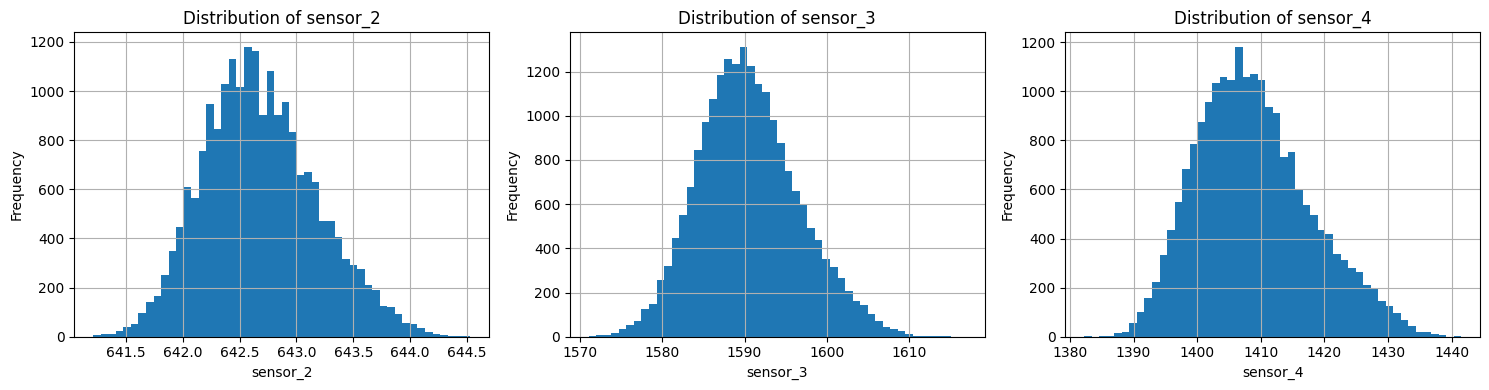


Missing Values per Column:
engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64


In [5]:
print("\n=== Q2: Sensor Distributions & Missing Values ===")
sensors_to_plot = ["sensor_2", "sensor_3", "sensor_4"]
plt.figure(figsize=(15, 4))
for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(1, 3, i)
    df[sensor].hist(bins=50)
    plt.title(f"Distribution of {sensor}")
    plt.xlabel(sensor)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("\nMissing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)

## Q3. Feature Engineering – Aggregation and Rolling Statistics

In [6]:
print("\n=== Q3: Feature Engineering ===")
agg_features = df.groupby('engine_id')['sensor_2'].agg(['mean','std']).reset_index()
agg_features.rename(columns={'mean':'sensor_2_mean', 'std':'sensor_2_std'}, inplace=True)

df = df.merge(agg_features, on='engine_id', how='left')

df['sensor_2_rollmean5'] = (
    df.groupby('engine_id')['sensor_2']
      .rolling(window=5, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)

print(df[['engine_id','cycle','sensor_2','sensor_2_mean','sensor_2_std','sensor_2_rollmean5']].head(15))


=== Q3: Feature Engineering ===
    engine_id  cycle  sensor_2  sensor_2_mean  sensor_2_std  \
0           1      1    641.82     642.621042      0.486795   
1           1      2    642.15     642.621042      0.486795   
2           1      3    642.35     642.621042      0.486795   
3           1      4    642.35     642.621042      0.486795   
4           1      5    642.37     642.621042      0.486795   
5           1      6    642.10     642.621042      0.486795   
6           1      7    642.48     642.621042      0.486795   
7           1      8    642.56     642.621042      0.486795   
8           1      9    642.12     642.621042      0.486795   
9           1     10    641.71     642.621042      0.486795   
10          1     11    642.28     642.621042      0.486795   
11          1     12    642.06     642.621042      0.486795   
12          1     13    643.07     642.621042      0.486795   
13          1     14    642.35     642.621042      0.486795   
14          1     15  

## Q4. Data Normalization

In [7]:
print("\n=== Q4: Data Normalization ===")
sensor_cols = [c for c in df.columns if c.startswith("sensor_") and not c.endswith(("mean","std","rollmean5"))]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[sensor_cols] = scaler.fit_transform(df[sensor_cols])

print("\nHead of normalized DataFrame:")
print(df_scaled[['engine_id','cycle'] + sensor_cols].head())

print("\nMeans & standard deviations after scaling:")
print(df_scaled[sensor_cols].describe().loc[['mean','std']])


=== Q4: Data Normalization ===

Head of normalized DataFrame:
   engine_id  cycle  sensor_1  sensor_2  sensor_3  sensor_4      sensor_5  \
0          1      1       0.0 -1.721725 -0.134255 -0.925936 -1.776357e-15   
1          1      2       0.0 -1.061780  0.211528 -0.643726 -1.776357e-15   
2          1      3       0.0 -0.661813 -0.413166 -0.525953 -1.776357e-15   
3          1      4       0.0 -0.661813 -1.261314 -0.784831 -1.776357e-15   
4          1      5       0.0 -0.621816 -1.251528 -0.301518 -1.776357e-15   

   sensor_6  sensor_7  sensor_8  ...  sensor_12  sensor_13  sensor_14  \
0  0.141683  1.121141 -0.516338  ...   0.334262  -1.058890  -0.269071   
1  0.141683  0.431930 -0.798093  ...   1.174899  -0.363646  -0.642845   
2  0.141683  1.008155 -0.234584  ...   1.364721  -0.919841  -0.551629   
3  0.141683  1.222827  0.188048  ...   1.961302  -0.224597  -0.520176   
4  0.141683  0.714393 -0.516338  ...   1.052871  -0.780793  -0.521748   

   sensor_15     sensor_16  sensor_

## Q5. Rolling Window Sequence Generation

In [8]:
print("\n=== Q5: Rolling Window Sequence Generation ===")
def generate_sequences(df, engine_col, cycle_col, feature_cols, window_size=30):
    X, engine_ids, cycles = [], [], []
    for eng in df[engine_col].unique():
        e = df[df[engine_col] == eng].sort_values(cycle_col).reset_index(drop=True)
        feats = e[feature_cols].values
        for i in range(window_size - 1, len(e)):
            seq = feats[i - window_size + 1 : i + 1]
            X.append(seq)
            engine_ids.append(eng)
            cycles.append(e.loc[i, cycle_col])
    return np.array(X), engine_ids, cycles

feature_cols = [c for c in df_scaled.columns if c.startswith("sensor_")]
window_size = 30
X, eng_ids, cyc_ids = generate_sequences(df_scaled, 'engine_id', 'cycle', feature_cols, window_size=window_size)

print("Shape of sequence array:", X.shape)
print("Example sequence shape:", X[0].shape)
print(f"Engine ID: {eng_ids[0]}, Cycle: {cyc_ids[0]}")
print("First sequence data:\n", X[0])

assert X.shape[1] == window_size, "Sequence window length mismatch"
assert all(cyc_ids[i] > cyc_ids[i-1] or eng_ids[i] != eng_ids[i-1] for i in range(1, len(cyc_ids))), "Cycle order violation"
print("\nBasic validation checks passed.")


=== Q5: Rolling Window Sequence Generation ===
Shape of sequence array: (17731, 30, 24)
Example sequence shape: (30, 24)
Engine ID: 1, Cycle: 30
First sequence data:
 [[ 0.00000000e+00 -1.72172539e+00 -1.34255176e-01 -9.25935964e-01
  -1.77635684e-15  1.41683329e-01  1.12114057e+00 -5.16338406e-01
  -8.62813315e-01  0.00000000e+00 -2.66466596e-01  3.34261840e-01
  -1.05889024e+00 -2.69071040e-01 -6.03815700e-01 -1.38777878e-17
  -7.81709786e-01  0.00000000e+00  0.00000000e+00  1.34849274e+00
   1.19442705e+00  6.42621042e+02  4.86795224e-01  6.41820000e+02]
 [ 0.00000000e+00 -1.06177971e+00  2.11528494e-01 -6.43725866e-01
  -1.77635684e-15  1.41683329e-01  4.31930175e-01 -7.98092999e-01
  -9.58817615e-01  0.00000000e+00 -1.91582925e-01  1.17489932e+00
  -3.63645998e-01 -6.42844737e-01 -2.75851811e-01 -1.38777878e-17
  -7.81709786e-01  0.00000000e+00  0.00000000e+00  1.01652793e+00
   1.23692196e+00  6.42621042e+02  4.86795224e-01  6.41985000e+02]
 [ 0.00000000e+00 -6.61812625e-01 -4.1

In [9]:
np.save("train_FD001_sequences.npy", X)
pd.DataFrame({"engine_id": eng_ids, "cycle": cyc_ids}).to_csv("sequence_meta.csv", index=False)
print("\nFiles saved: train_FD001_sequences.npy and sequence_meta.csv")


Files saved: train_FD001_sequences.npy and sequence_meta.csv
